In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('/Users/sara/PycharmProjects/specparam/notebook/mystyle.mplstyle')

In [230]:
# Load the data
data_full = pd.read_csv('/Users/sara/PycharmProjects/specparam/data/final product/solar_like_param_LAMOST_DR9_v2.csv')
data_full.columns

/var/folders/pc/px2hh_yx5kx7bc_h03thddh00000gn/T/ipykernel_86780/4270685184.py:2: DtypeWarning: Columns (28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  data_full = pd.read_csv('/Users/sara/PycharmProjects/specparam/data/final product/solar_like_param_LAMOST_DR9_v2.csv')


Index(['obsid', 'ra', 'dec', 'snrg', 'snrr', 'flag', 'cnn_teff', 'cnn_logg',
       'cnn_feh', 'cnn_mg', 'cnn_bprp', 'cnn_distance', 'lasp_teff',
       'lasp_teff_err', 'lasp_logg', 'lasp_logg_err', 'lasp_feh',
       'lasp_feh_err', 'lasp_rv', 'lasp_rv_err', 'gaia_source_id', 'parallax',
       'parallax_over_error', 'parallax_zeropoint', 'parallax_correction',
       'gaia_g_mean_mag', 'gaia_bp_rp', 'r_med_geo', 'APOGEE_ID', 'STARFLAG',
       'PARAMFLAG', 'ASPCAPFLAG', 'apogee_teff', 'apogee_teff_err',
       'apogee_logg', 'apogee_logg_err', 'apogee_feh', 'apogee_feh_err',
       '2MASS_star_id', 'GALAH_sobject_id', 'flag_sp', 'red_flag', 'flag_fe_h',
       'galah_teff', 'galah_e_teff', 'galah_logg', 'galah_e_logg',
       'galah_fe_h', 'galah_e_fe_h'],
      dtype='object')

# my vs. APOGEE

In [127]:
# 要筛选的列
data_ap = data_full.dropna(subset=['apogee_teff', 'apogee_logg', 'apogee_feh'])
print(data_ap.shape[0])
cond_ap = (
    (data_ap['STARFLAG'] == 0) &
   # (data_ap['ASPCAPFLAG'] == 0) &
   (data_ap['apogee_teff_err'] < 200) & 
   (data_ap['apogee_logg_err'] < 0.2) & 
   (data_ap['apogee_feh_err'] < 0.2) &
   (data_ap['snrg']>50)
           )
data_ap = data_ap[cond_ap].reset_index(drop=True)
print(data_ap.shape[0])

6040
2677


In [128]:
ap_teff = data_ap['apogee_teff']
ap_logg = data_ap['apogee_logg']
ap_feh = data_ap['apogee_feh']
cnn_teff = data_ap['cnn_teff']
cnn_logg = data_ap['cnn_logg']
cnn_feh = data_ap['cnn_feh']

r_teff = cnn_teff - ap_teff
r_logg = cnn_logg - ap_logg
r_feh = cnn_feh - ap_feh

r_teff_mean, r_teff_std = np.mean(r_teff), np.std(r_teff)
r_logg_mean, r_logg_std = np.mean(r_logg), np.std(r_logg)
r_feh_mean, r_feh_std = np.mean(r_feh), np.std(r_feh)

# cond_ap2 = (
#     (r_teff < r_teff_std * 3) |
#     (r_logg < r_logg_std * 3) |
#     (r_feh < r_feh_std * 3)
# )
# data_ap = data_ap[cond_ap2].reset_index(drop=True)
print(data_ap.shape[0])

2677


Text(0.05, 0.8, '$\\sigma=\\ $0.06')

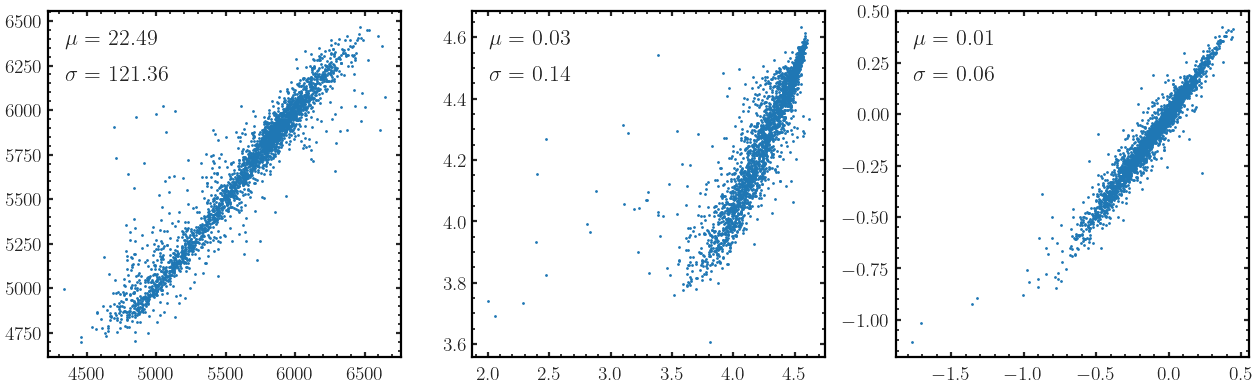

In [129]:
fig, ax = plt.subplots(1, 3, figsize=(15.5, 4.5))

ax[0].scatter(ap_teff, cnn_teff, s=1)
# lim_min, lim_max = 4300, 6800
# ax[0].set_xlim(lim_min, lim_max)
# ax[0].set_ylim(lim_min, lim_max)
# ax[0].plot([lim_min, lim_max], [lim_min, lim_max], 'r--', lw=3)
ax[0].text(0.05,0.9,'$\mu=\ $'+'%.2f'%(r_teff_mean),transform=ax[0].transAxes)
ax[0].text(0.05,0.8,'$\sigma=\ $'+'%.2f'%(r_teff_std),transform=ax[0].transAxes)

ax[1].scatter(ap_logg, cnn_logg, s=1)
# lim_min, lim_max = 3.6, 4.7
# ax[1].set_xlim(lim_min, lim_max)
# ax[1].set_ylim(lim_min, lim_max)
# ax[1].plot([lim_min, lim_max], [lim_min, lim_max], 'r--', lw=3)
ax[1].text(0.05,0.9,'$\mu=\ $'+'%.2f'%(r_logg_mean),transform=ax[1].transAxes)
ax[1].text(0.05,0.8,'$\sigma=\ $'+'%.2f'%(r_logg_std),transform=ax[1].transAxes)

ax[2].scatter(ap_feh, cnn_feh, s=1)
# lim_min, lim_max = -1.0, 0.5
# ax[2].set_xlim(lim_min, lim_max)
# ax[2].set_ylim(lim_min, lim_max)
# ax[2].plot([lim_min, lim_max], [lim_min, lim_max], 'r--', lw=3)
ax[2].text(0.05,0.9,'$\mu=\ $'+'%.2f'%(r_feh_mean),transform=ax[2].transAxes)
ax[2].text(0.05,0.8,'$\sigma=\ $'+'%.2f'%(r_feh_std),transform=ax[2].transAxes)

# my vs. GALAH

In [151]:
data_full.columns

Index(['obsid', 'ra', 'dec', 'snrg', 'snrr', 'flag', 'cnn_teff', 'cnn_logg',
       'cnn_feh', 'cnn_mg', 'cnn_bprp', 'cnn_distance', 'lasp_teff',
       'lasp_teff_err', 'lasp_logg', 'lasp_logg_err', 'lasp_feh',
       'lasp_feh_err', 'lasp_rv', 'lasp_rv_err', 'gaia_source_id', 'parallax',
       'parallax_over_error', 'parallax_zeropoint', 'parallax_correction',
       'gaia_g_mean_mag', 'gaia_bp_rp', 'r_med_geo', 'APOGEE_ID', 'STARFLAG',
       'PARAMFLAG', 'ASPCAPFLAG', 'apogee_teff', 'apogee_teff_err',
       'apogee_logg', 'apogee_logg_err', 'apogee_feh', 'apogee_feh_err',
       '2MASS_star_id', 'GALAH_sobject_id', 'flag_sp', 'red_flag', 'flag_fe_h',
       'galah_teff', 'galah_e_teff', 'galah_logg', 'galah_e_logg',
       'galah_fe_h', 'galah_e_fe_h'],
      dtype='object')

In [131]:
# 要筛选的列
data_gl = data_full.dropna(subset=['galah_teff', 'galah_logg', 'galah_fe_h'])
print(data_gl.shape[0])
cond_gl = (
        (data_gl['flag_sp'] == 0) &
        (data_gl['red_flag'] == 0) &
        (data_gl['flag_fe_h'] == 0) &
        (data_gl['galah_e_teff'] < 200) &
        (data_gl['galah_e_logg'] < 0.2) &
        (data_gl['galah_e_fe_h'] < 0.2) &
        (data_gl['snrg'] > 50)
)
data_gl = data_gl[cond_gl]
print(data_gl.shape[0])

6329
2218


In [132]:
gl_teff = data_gl['galah_teff']
gl_logg = data_gl['galah_logg']
gl_feh = data_gl['galah_fe_h']
cnn_teff = data_gl['cnn_teff']
cnn_logg = data_gl['cnn_logg']
cnn_feh = data_gl['cnn_feh']

r_teff = cnn_teff - gl_teff
r_logg = cnn_logg - gl_logg
r_feh = cnn_feh - gl_feh

r_teff_mean, r_teff_std = np.mean(r_teff), np.std(r_teff)
r_logg_mean, r_logg_std = np.mean(r_logg), np.std(r_logg)
r_feh_mean, r_feh_std = np.mean(r_feh), np.std(r_feh)

Text(0.05, 0.8, '$\\sigma=\\ $0.13')

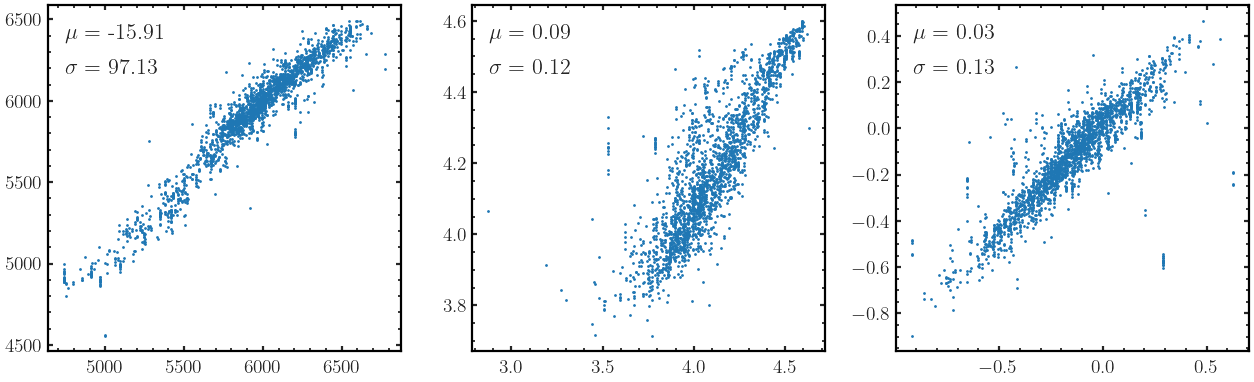

In [133]:
fig, ax = plt.subplots(1, 3, figsize=(15.5, 4.5))

ax[0].scatter(gl_teff, cnn_teff, s=1)
# lim_min, lim_max = 4300, 6800
# ax[0].set_xlim(lim_min, lim_max)
# ax[0].set_ylim(lim_min, lim_max)
# ax[0].plot([lim_min, lim_max], [lim_min, lim_max], 'r--', lw=3)
ax[0].text(0.05,0.9,'$\mu=\ $'+'%.2f'%(r_teff_mean),transform=ax[0].transAxes)
ax[0].text(0.05,0.8,'$\sigma=\ $'+'%.2f'%(r_teff_std),transform=ax[0].transAxes)

ax[1].scatter(gl_logg, cnn_logg, s=1)
# lim_min, lim_max = 3.6, 4.7
# ax[1].set_xlim(lim_min, lim_max)
# ax[1].set_ylim(lim_min, lim_max)
# ax[1].plot([lim_min, lim_max], [lim_min, lim_max], 'r--', lw=3)
ax[1].text(0.05,0.9,'$\mu=\ $'+'%.2f'%(r_logg_mean),transform=ax[1].transAxes)
ax[1].text(0.05,0.8,'$\sigma=\ $'+'%.2f'%(r_logg_std),transform=ax[1].transAxes)

ax[2].scatter(gl_feh, cnn_feh, s=1)
# lim_min, lim_max = -1.0, 0.5
# ax[2].set_xlim(lim_min, lim_max)
# ax[2].set_ylim(lim_min, lim_max)
# ax[2].plot([lim_min, lim_max], [lim_min, lim_max], 'r--', lw=3)
ax[2].text(0.05,0.9,'$\mu=\ $'+'%.2f'%(r_feh_mean),transform=ax[2].transAxes)
ax[2].text(0.05,0.8,'$\sigma=\ $'+'%.2f'%(r_feh_std),transform=ax[2].transAxes)

# APOGEE vs GALAH

In [153]:
data_glap = data_full.dropna(subset=['galah_teff', 'galah_logg', 'galah_fe_h', 'apogee_teff', 'apogee_logg', 'apogee_feh'])
print(data_glap.shape[0])
cond_glap = (
        (data_glap['flag_sp'] == 0) &
        (data_glap['red_flag'] == 0) &
        (data_glap['flag_fe_h'] == 0) &
        (data_glap['STARFLAG'] == 0) &
        (data_glap['galah_e_teff'] < 200) &
        (data_glap['galah_e_logg'] < 0.2) &
        (data_glap['galah_e_fe_h'] < 0.2) &
        (data_glap['apogee_teff_err'] < 200) & 
        (data_glap['apogee_logg_err'] < 0.2) & 
        (data_glap['apogee_feh_err'] < 0.2) 
        # (data_gl['snrg'] > 50)
)
data_glap = data_glap[cond_glap]
print(data_glap.shape[0])

327
101


In [154]:
gl_teff = data_glap['galah_teff']
gl_logg = data_glap['galah_logg']
gl_feh = data_glap['galah_fe_h']
ap_teff = data_glap['apogee_teff']
ap_logg = data_glap['apogee_logg']
ap_feh = data_glap['apogee_feh']

r_teff = ap_teff - gl_teff
r_logg = ap_logg - gl_logg
r_feh = ap_feh - gl_feh

r_teff_mean, r_teff_std = np.mean(r_teff), np.std(r_teff)
r_logg_mean, r_logg_std = np.mean(r_logg), np.std(r_logg)
r_feh_mean, r_feh_std = np.mean(r_feh), np.std(r_feh)

print(r_teff_mean, r_teff_std)
print(r_logg_mean, r_logg_std)
print(r_feh_mean, r_feh_std)

-54.2022702970297 154.44385585572724
0.04270219702970294 0.09621295791124596
-0.011598675783168312 0.11205617820137799


Text(0.05, 0.8, '$\\sigma=\\ $0.11')

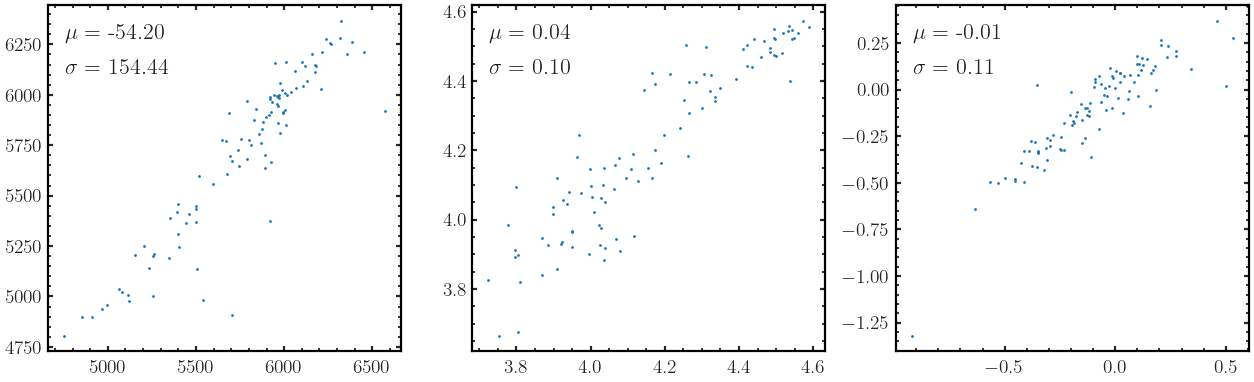

In [155]:
fig, ax = plt.subplots(1, 3, figsize=(15.5, 4.5))

ax[0].scatter(gl_teff, ap_teff, s=1)
# lim_min, lim_max = 4300, 6800
# ax[0].set_xlim(lim_min, lim_max)
# ax[0].set_ylim(lim_min, lim_max)
# ax[0].plot([lim_min, lim_max], [lim_min, lim_max], 'r--', lw=3)
ax[0].text(0.05,0.9,'$\mu=\ $'+'%.2f'%(r_teff_mean),transform=ax[0].transAxes)
ax[0].text(0.05,0.8,'$\sigma=\ $'+'%.2f'%(r_teff_std),transform=ax[0].transAxes)

ax[1].scatter(gl_logg, ap_logg, s=1)
# lim_min, lim_max = 3.6, 4.7
# ax[1].set_xlim(lim_min, lim_max)
# ax[1].set_ylim(lim_min, lim_max)
# ax[1].plot([lim_min, lim_max], [lim_min, lim_max], 'r--', lw=3)
ax[1].text(0.05,0.9,'$\mu=\ $'+'%.2f'%(r_logg_mean),transform=ax[1].transAxes)
ax[1].text(0.05,0.8,'$\sigma=\ $'+'%.2f'%(r_logg_std),transform=ax[1].transAxes)

ax[2].scatter(gl_feh, ap_feh, s=1)
# lim_min, lim_max = -1.0, 0.5
# ax[2].set_xlim(lim_min, lim_max)
# ax[2].set_ylim(lim_min, lim_max)
# ax[2].plot([lim_min, lim_max], [lim_min, lim_max], 'r--', lw=3)
ax[2].text(0.05,0.9,'$\mu=\ $'+'%.2f'%(r_feh_mean),transform=ax[2].transAxes)
ax[2].text(0.05,0.8,'$\sigma=\ $'+'%.2f'%(r_feh_std),transform=ax[2].transAxes)

# final figure

In [231]:
# my vs. APOGEE
data_ap = data_full.dropna(subset=['apogee_teff', 'apogee_logg', 'apogee_feh'])
print(data_ap.shape[0])
cond_ap = (
    (data_ap['STARFLAG'] == 0) &
   # (data_ap['ASPCAPFLAG'] == 0) &
   (data_ap['apogee_teff_err'] < 200) & 
   (data_ap['apogee_logg_err'] < 0.2) & 
   (data_ap['apogee_feh_err'] < 0.2) &
   (data_ap['snrg']>50)
           )
data_ap = data_ap[cond_ap].reset_index(drop=True)
print(data_ap.shape[0])

# my vs. GALAH
data_gl = data_full.dropna(subset=['galah_teff', 'galah_logg', 'galah_fe_h'])
print(data_gl.shape[0])
cond_gl = (
        (data_gl['flag_sp'] == 0) &
        (data_gl['red_flag'] == 0) &
        (data_gl['flag_fe_h'] == 0) &
        (data_gl['galah_e_teff'] < 200) &
        (data_gl['galah_e_logg'] < 0.2) &
        (data_gl['galah_e_fe_h'] < 0.2) &
        (data_gl['snrg'] > 50)
)
data_gl = data_gl[cond_gl]
print(data_gl.shape[0])

6040
2677
6329
2218


In [232]:
ap_teff = data_ap['apogee_teff']
ap_logg = data_ap['apogee_logg']
ap_feh = data_ap['apogee_feh']

gl_teff = data_gl['galah_teff']
gl_logg = data_gl['galah_logg']
gl_feh = data_gl['galah_fe_h']

cap_teff = data_ap['cnn_teff']
cap_logg = data_ap['cnn_logg']
cap_feh = data_ap['cnn_feh']
cgl_teff = data_gl['cnn_teff']
cgl_logg = data_gl['cnn_logg']
cgl_feh = data_gl['cnn_feh']

rap_teff = cap_teff - ap_teff
rap_logg = cap_logg - ap_logg
rap_feh = cap_feh - ap_feh
rgl_teff = cgl_teff - gl_teff
rgl_logg = cgl_logg - gl_logg
rgl_feh = cgl_feh - gl_feh

rap_teff_mean, rap_teff_std = np.mean(rap_teff), np.std(rap_teff)
rap_logg_mean, rap_logg_std = np.mean(rap_logg), np.std(rap_logg)
rap_feh_mean, rap_feh_std = np.mean(rap_feh), np.std(rap_feh)
rgl_teff_mean, rgl_teff_std = np.mean(rgl_teff), np.std(rgl_teff)
rgl_logg_mean, rgl_logg_std = np.mean(rgl_logg), np.std(rgl_logg)
rgl_feh_mean, rgl_feh_std = np.mean(rgl_feh), np.std(rgl_feh)

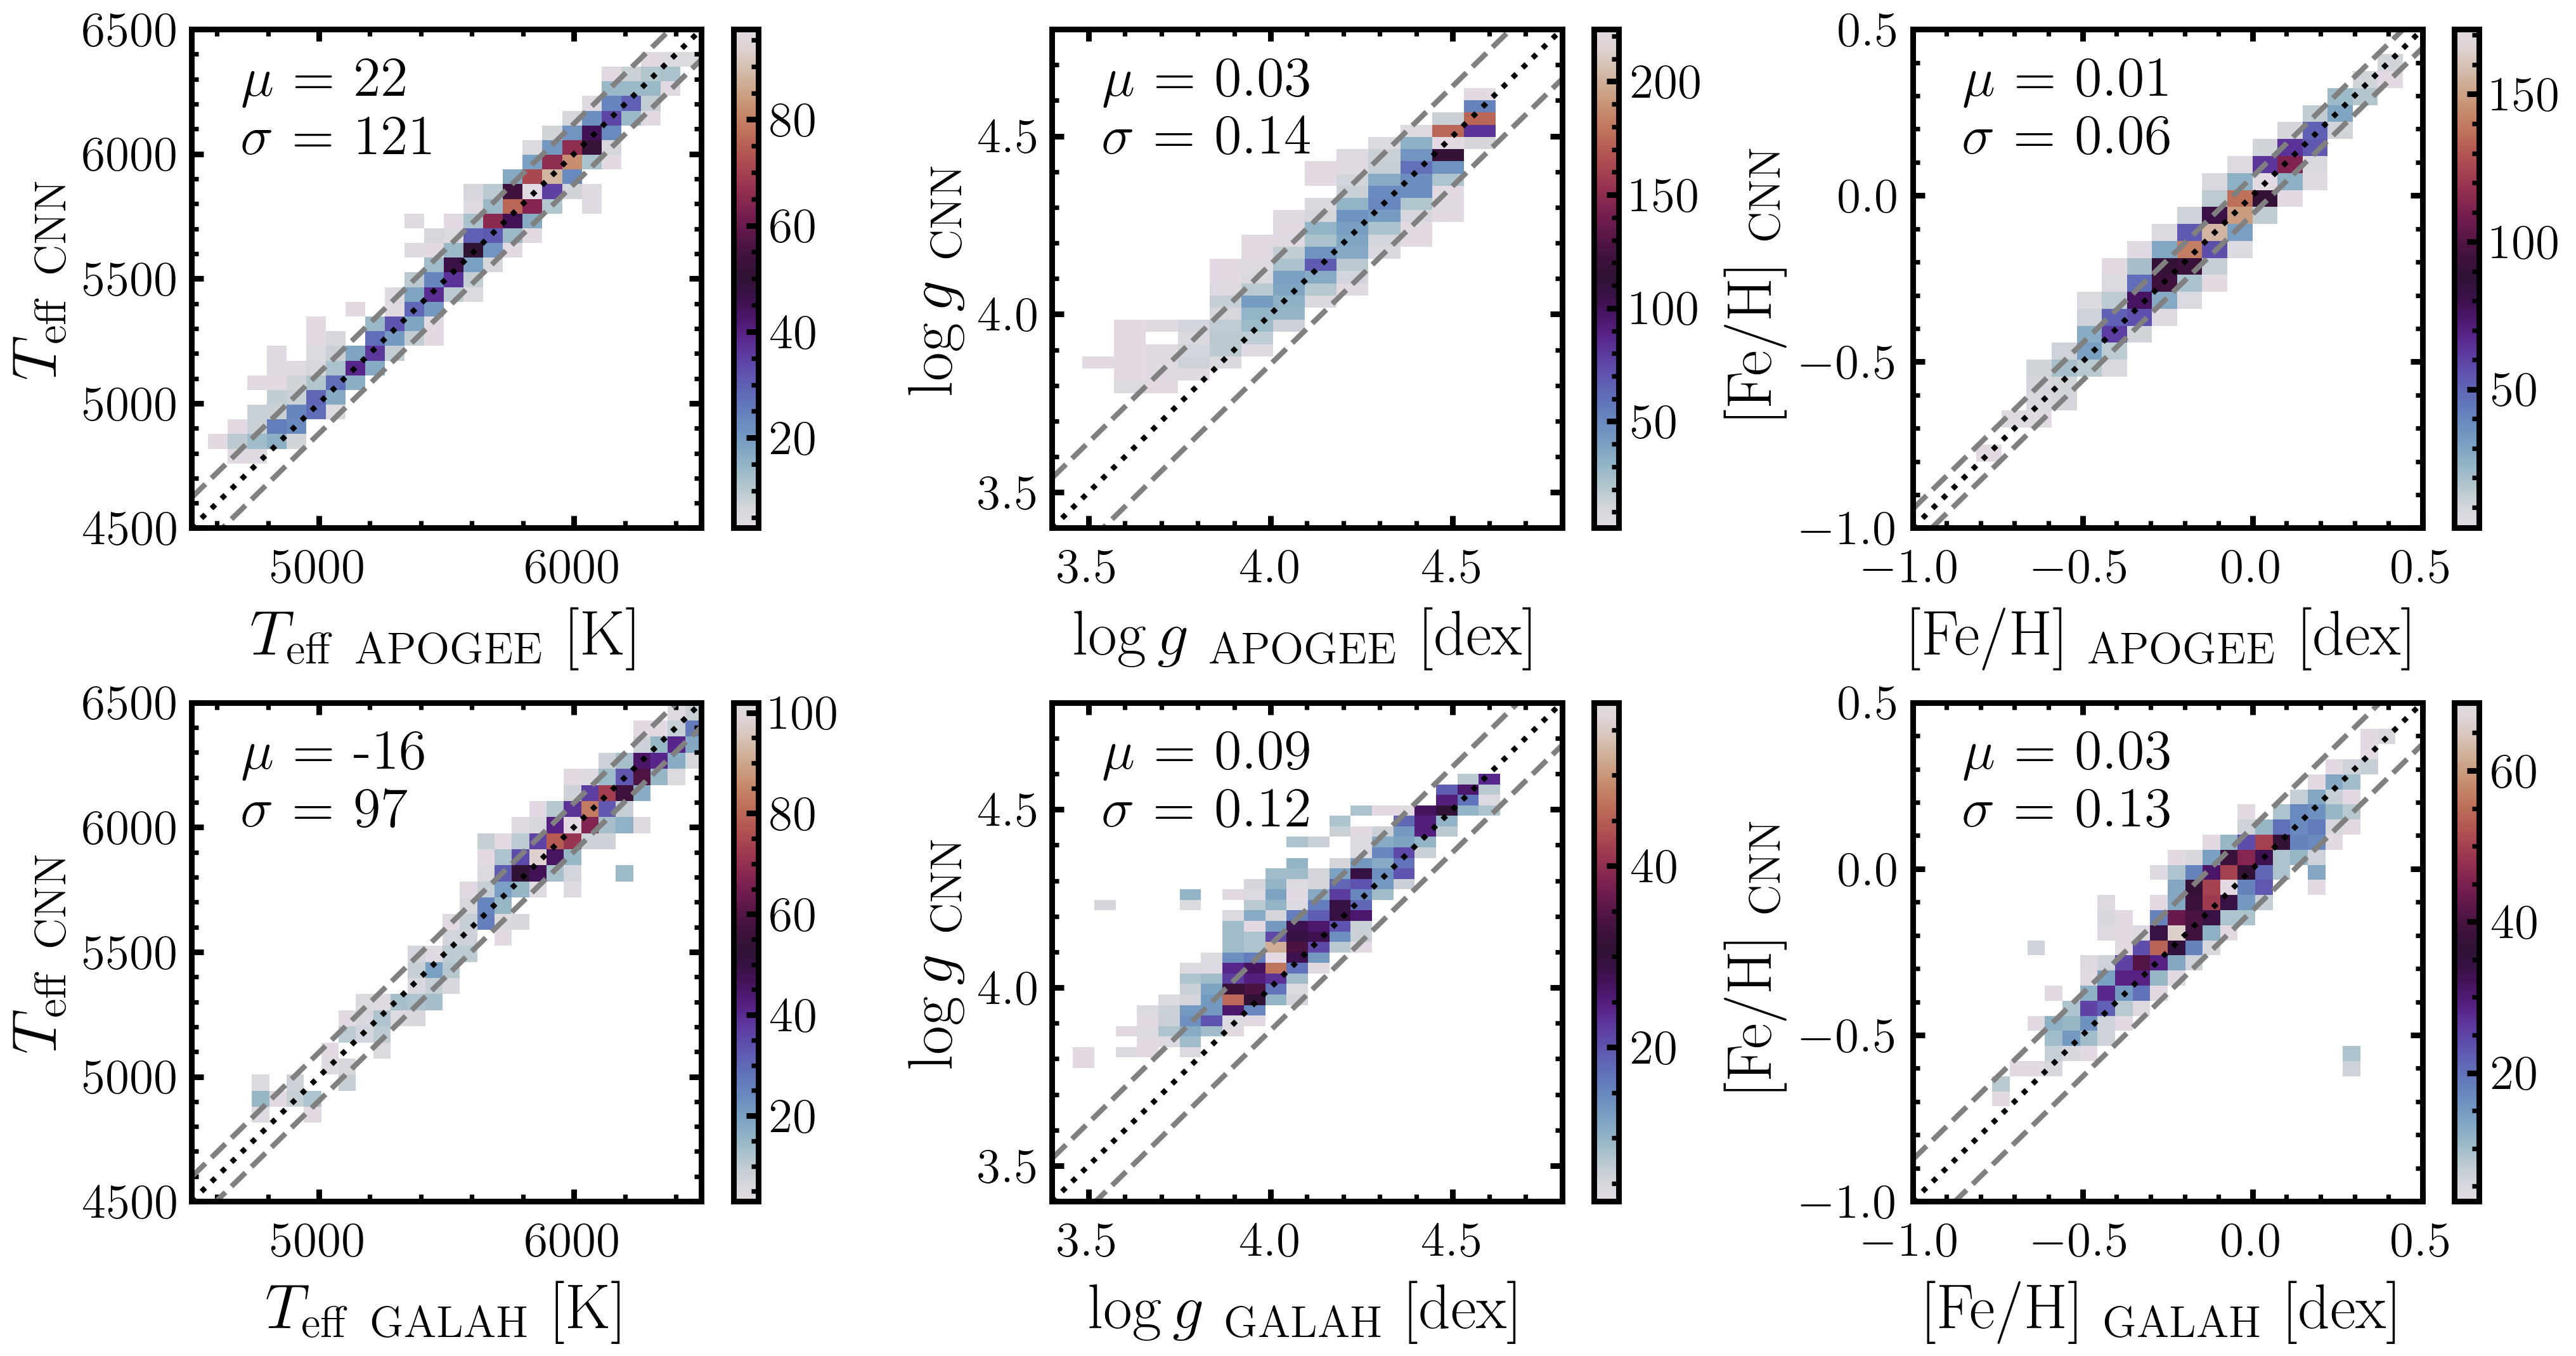

In [260]:
fig = plt.figure(figsize=(12, 6.), dpi=400)
gs = GridSpec(2, 3, figure=fig, hspace=0.35, wspace=0.35)

cmap = plt.cm.twilight
cmap.set_bad(color='white')  # 设置空值颜色为白色

bins = 30
minnum = 2


# my vs. APOGEE
ax11 = fig.add_subplot(gs[0, 0])
h_ax11, xe_ax11, ye_ax11 = np.histogram2d(ap_teff, cap_teff, bins=bins)
h_ax11 = np.ma.masked_where(h_ax11 <= minnum, h_ax11)
c_ax11 = ax11.pcolormesh(xe_ax11, ye_ax11, h_ax11.T, cmap=cmap)
fig.colorbar(c_ax11, ax=ax11)

ax12 = fig.add_subplot(gs[0, 1])
h_ax12, xe_ax12, ye_ax12 = np.histogram2d(ap_logg, cap_logg, bins=bins)
h_ax12 = np.ma.masked_where(h_ax12 <= minnum, h_ax12)
c_ax12 = ax12.pcolormesh(xe_ax12, ye_ax12, h_ax12.T, cmap=cmap)
fig.colorbar(c_ax12, ax=ax12)

ax13 = fig.add_subplot(gs[0, 2])
h_ax13, xe_ax13, ye_ax13 = np.histogram2d(ap_feh, cap_feh, bins=bins)
h_ax13 = np.ma.masked_where(h_ax13 <= minnum, h_ax13)
c_ax13 = ax13.pcolormesh(xe_ax13, ye_ax13, h_ax13.T, cmap=cmap)
fig.colorbar(c_ax13, ax=ax13)

# my vs. GALAH
ax21 = fig.add_subplot(gs[1, 0])
h_ax21, xe_ax21, ye_ax21 = np.histogram2d(gl_teff, cgl_teff, bins=bins)
h_ax21 = np.ma.masked_where(h_ax21 <= minnum, h_ax21)
c_ax21 = ax21.pcolormesh(xe_ax21, ye_ax21, h_ax21.T, cmap=cmap)
fig.colorbar(c_ax21, ax=ax21)

ax22 = fig.add_subplot(gs[1, 1])
h_ax22, xe_ax22, ye_ax22 = np.histogram2d(gl_logg, cgl_logg, bins=bins)
h_ax22 = np.ma.masked_where(h_ax22 <= minnum, h_ax22)
c_ax22 = ax22.pcolormesh(xe_ax22, ye_ax22, h_ax22.T, cmap=cmap)
fig.colorbar(c_ax22, ax=ax22)

ax23 = fig.add_subplot(gs[1, 2])
h_ax23, xe_ax23, ye_ax23 = np.histogram2d(gl_feh, cgl_feh, bins=bins)
h_ax23 = np.ma.masked_where(h_ax23 <= minnum, h_ax23)
c_ax23 = ax23.pcolormesh(xe_ax23, ye_ax23, h_ax23.T, cmap=cmap)
fig.colorbar(c_ax23, ax=ax23)


teff_min, teff_max = 4500, 6500
ax11.set_xlim(teff_min, teff_max)
ax11.set_ylim(teff_min, teff_max)
ax21.set_xlim(teff_min, teff_max)
ax21.set_ylim(teff_min, teff_max)

logg_min, logg_max = 3.4, 4.8
ax12.set_xlim(logg_min, logg_max)
ax12.set_ylim(logg_min, logg_max)
ax22.set_xlim(logg_min, logg_max)
ax22.set_ylim(logg_min, logg_max)

feh_min, feh_max = -1.0, 0.5
ax13.set_xlim(feh_min, feh_max)
ax13.set_ylim(feh_min, feh_max)
ax23.set_xlim(feh_min, feh_max)
ax23.set_ylim(feh_min, feh_max)

ax11.set_xlabel('$T_{\\rm{eff}}\ _{\\rm{APOGEE}}$'+' [K]')
ax21.set_xlabel('$T_{\\rm{eff}}\ _{\\rm{GALAH}}$'+' [K]')
ax11.set_ylabel('$T_{\\rm{eff}}\ _{\\rm{CNN}}$')
ax21.set_ylabel('$T_{\\rm{eff}}\ _{\\rm{CNN}}$')
ax12.set_xlabel('$\log{g}\ _{\\rm{APOGEE}}$'+' [dex]')
ax22.set_xlabel('$\log{g}\ _{\\rm{GALAH}}$'+' [dex]')
ax12.set_ylabel('$\log{g}\ _{\\rm{CNN}}$')
ax22.set_ylabel('$\log{g}\ _{\\rm{CNN}}$')
ax13.set_xlabel('[Fe/H]$\ _{\\rm{APOGEE}}$'+' [dex]')
ax23.set_xlabel('[Fe/H]$\ _{\\rm{GALAH}}$'+' [dex]')
ax13.set_ylabel('[Fe/H]$\ _{\\rm{CNN}}$')
ax23.set_ylabel('[Fe/H]$\ _{\\rm{CNN}}$')


ax11.plot([teff_min, teff_max], [teff_min, teff_max], color='k', linestyle=':', linewidth=1.5)
ax12.plot([logg_min, logg_max], [logg_min, logg_max], color='k', linestyle=':', linewidth=1.5)
ax13.plot([feh_min, feh_max], [feh_min, feh_max], color='k', linestyle=':', linewidth=1.5)
ax21.plot([teff_min, teff_max], [teff_min, teff_max], color='k', linestyle=':', linewidth=1.5)
ax22.plot([logg_min, logg_max], [logg_min, logg_max], color='k', linestyle=':', linewidth=1.5)
ax23.plot([feh_min, feh_max], [feh_min, feh_max], color='k', linestyle=':', linewidth=1.5)

ax11.plot([teff_min, teff_max], [teff_min + rap_teff_std, teff_max + rap_teff_std], color='grey', linestyle='--', linewidth=1.5)
ax11.plot([teff_min, teff_max], [teff_min - rap_teff_std, teff_max - rap_teff_std], color='grey', linestyle='--', linewidth=1.5)
ax12.plot([logg_min, logg_max], [logg_min + rap_logg_std, logg_max + rap_logg_std], color='grey', linestyle='--', linewidth=1.5)
ax12.plot([logg_min, logg_max], [logg_min - rap_logg_std, logg_max - rap_logg_std], color='grey', linestyle='--', linewidth=1.5)
ax13.plot([feh_min, feh_max], [feh_min + rap_feh_std, feh_max + rap_feh_std], color='grey', linestyle='--', linewidth=1.5)
ax13.plot([feh_min, feh_max], [feh_min - rap_feh_std, feh_max - rap_feh_std], color='grey', linestyle='--', linewidth=1.5)
ax21.plot([teff_min, teff_max], [teff_min + rgl_teff_std, teff_max + rgl_teff_std], color='grey', linestyle='--', linewidth=1.5)
ax21.plot([teff_min, teff_max], [teff_min - rgl_teff_std, teff_max - rgl_teff_std], color='grey', linestyle='--', linewidth=1.5)
ax22.plot([logg_min, logg_max], [logg_min + rgl_logg_std, logg_max + rgl_logg_std], color='grey', linestyle='--', linewidth=1.5)
ax22.plot([logg_min, logg_max], [logg_min - rgl_logg_std, logg_max - rgl_logg_std], color='grey', linestyle='--', linewidth=1.5)
ax23.plot([feh_min, feh_max], [feh_min + rgl_feh_std, feh_max + rgl_feh_std], color='grey', linestyle='--', linewidth=1.5)
ax23.plot([feh_min, feh_max], [feh_min - rgl_feh_std, feh_max - rgl_feh_std], color='grey', linestyle='--', linewidth=1.5)


ax11.text(0.1, 0.75, f'$\mu$ = {rap_teff_mean:.0f}\n'
                     f'$\sigma$ = {rap_teff_std:.0f}', transform=ax11.transAxes)
ax12.text(0.1, 0.75, f'$\mu$ = {rap_logg_mean:.2f}\n'
                     f'$\sigma$ = {rap_logg_std:.2f}', transform=ax12.transAxes)
ax13.text(0.1, 0.75, f'$\mu$ = {rap_feh_mean:.2f}\n'
                     f'$\sigma$ = {rap_feh_std:.2f}', transform=ax13.transAxes)
ax21.text(0.1, 0.75, f'$\mu$ = {rgl_teff_mean:.0f}\n'
                     f'$\sigma$ = {rgl_teff_std:.0f}', transform=ax21.transAxes)
ax22.text(0.1, 0.75, f'$\mu$ = {rgl_logg_mean:.2f}\n'
                     f'$\sigma$ = {rgl_logg_std:.2f}', transform=ax22.transAxes)
ax23.text(0.1, 0.75, f'$\mu$ = {rgl_feh_mean:.2f}\n'
                     f'$\sigma$ = {rgl_feh_std:.2f}', transform=ax23.transAxes)


plt.savefig('../figure/comp_param.pdf', bbox_inches='tight')